In [139]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Preprocessing Daata Demo

In [140]:
TRAIN_DATASET_PATH = 'C:/Users/hp/OneDrive/Desktop/BraTS21'

In [141]:
test_image_flair=nib.load(TRAIN_DATASET_PATH + '/BraTS2021_00002/BraTS2021_00002_flair.nii.gz').get_fdata()
print(test_image_flair.max())

2563.0


In [142]:
test_image_flair.shape

(240, 240, 155)

Scalers are applied to 1D so let us reshape and then reshape back to original shape. 

In [143]:
test_image_flair=scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
print(test_image_flair.max())

1.0


In [144]:
test_image_t1=nib.load(TRAIN_DATASET_PATH + '/BraTS2021_00002/BraTS2021_00002_t1.nii.gz').get_fdata()
test_image_t1=scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)

test_image_t1ce=nib.load(TRAIN_DATASET_PATH + '/BraTS2021_00002/BraTS2021_00002_t1ce.nii.gz').get_fdata()
test_image_t1ce=scaler.fit_transform(test_image_t1ce.reshape(-1, test_image_t1ce.shape[-1])).reshape(test_image_t1ce.shape)

test_image_t2=nib.load(TRAIN_DATASET_PATH + '/BraTS2021_00002/BraTS2021_00002_t2.nii.gz').get_fdata()
test_image_t2=scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)

test_mask=nib.load(TRAIN_DATASET_PATH + '/BraTS2021_00002/BraTS2021_00002_seg.nii.gz').get_fdata()
test_mask=test_mask.astype(np.uint8)

In [145]:
print(np.unique(test_mask))  #0, 1, 2, 4 (Need to reencode to 0, 1, 2, 3)

[0 1 2 4]


In [146]:
test_mask[test_mask==4] = 3  #Reassign mask values 4 to 3
print(np.unique(test_mask)) 

[0 1 2 3]


# Show the data 

66


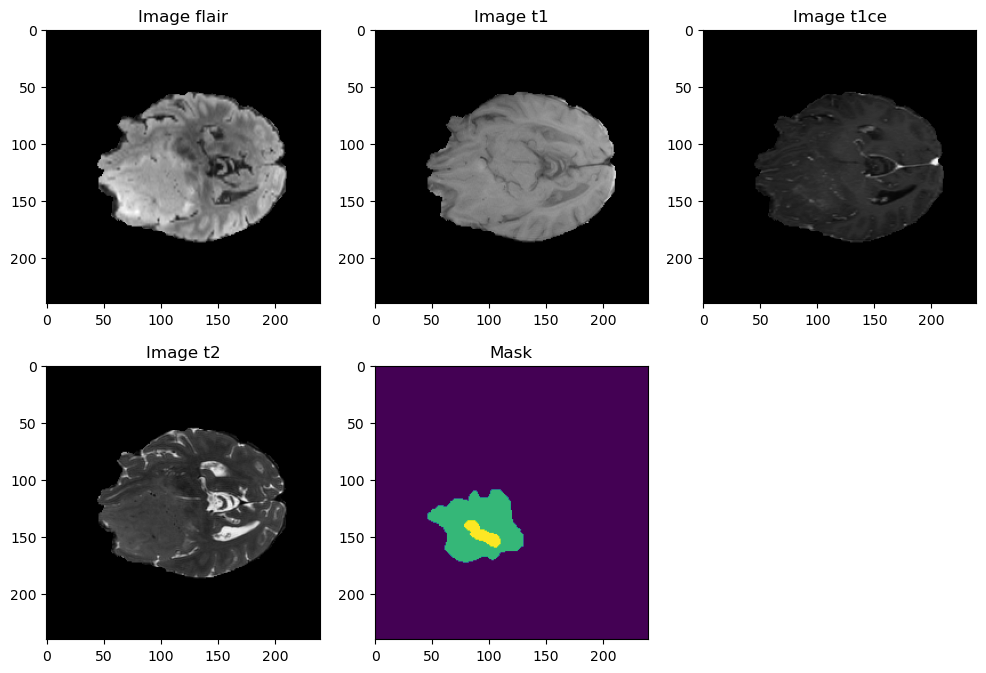

In [147]:
import random
n_slice=random.randint(0, test_mask.shape[2])# u can chose 86 :)
print(n_slice)
plt.figure(figsize=(12, 8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title('Image flair')
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title('Image t1')
plt.subplot(233)
plt.imshow(test_image_t1ce[:,:,n_slice], cmap='gray')
plt.title('Image t1ce')
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title('Image t2')
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

**PART 2**: Explore the process of combining images to channels and divide them to patches

In [148]:
#Flair, T1CE, annd T2 have the most information
#Combine t1ce, t2, and flair into single multichannel image
combined_x = np.stack([test_image_flair, test_image_t1ce, test_image_t2], axis=3)

In [149]:
#Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
#cropping x, y, and z
# combined_x=combined_x[56:184, 56:184, 13:141] #Crop to 128x128x128x4
combined_x=combined_x[56:184, 40:200, 13:141] #Crop to 136x136x136x4
combined_x.shape

(128, 160, 128, 3)

In [150]:
# test_mask = test_mask[56:184, 56:184, 13:141]
test_mask = test_mask[56:184, 40:200, 13:141]

In [151]:
test_mask.shape

(128, 160, 128)

86


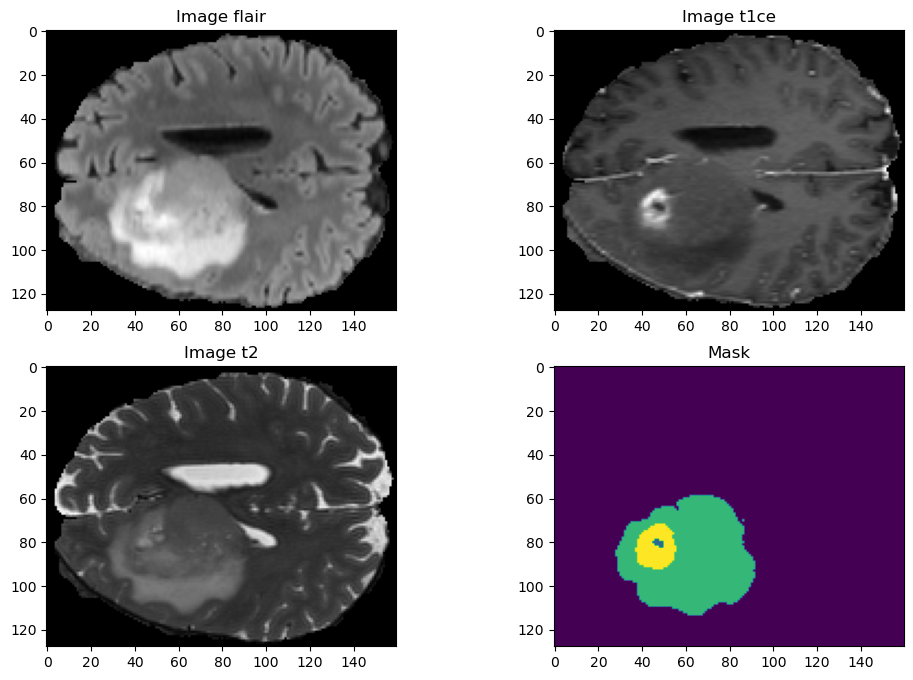

In [152]:
n_slice=86
print(n_slice)
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice, 0], cmap='gray')
plt.title('Image flair')
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice, 1], cmap='gray')
plt.title('Image t1ce')
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice, 2], cmap='gray')
plt.title('Image t2')
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice])
plt.title('Mask')
plt.show()

save the combined image

In [22]:
np.save('combined00002.npy', combined_x)

In [24]:
my_img=np.load('combined00002.npy')

# Preprocessing Daata 

Load 

In [162]:
t2_list    = sorted(glob.glob('D:/Data/Data_Brats2021/*/*t2.nii.gz'))
t1ce_list  = sorted(glob.glob('D:/Data/Data_Brats2021/*/*t1ce.nii.gz'))
flair_list = sorted(glob.glob('D:/Data/Data_Brats2021/*/*flair.nii.gz'))
mask_list  = sorted(glob.glob('D:/Data/Data_Brats2021/*/*seg.nii.gz'))

In [165]:
for img in range(len(t2_list)):   #Using t1_list as all lists are of same size
    print("Now preparing image and masks number: ", img)
      
    temp_image_t2=nib.load(t2_list[img]).get_fdata()
    temp_image_t2=scaler.fit_transform(temp_image_t2.reshape(-1, temp_image_t2.shape[-1])).reshape(temp_image_t2.shape)
   
    temp_image_t1ce=nib.load(t1ce_list[img]).get_fdata()
    temp_image_t1ce=scaler.fit_transform(temp_image_t1ce.reshape(-1, temp_image_t1ce.shape[-1])).reshape(temp_image_t1ce.shape)
   
    temp_image_flair=nib.load(flair_list[img]).get_fdata()
    temp_image_flair=scaler.fit_transform(temp_image_flair.reshape(-1, temp_image_flair.shape[-1])).reshape(temp_image_flair.shape)
        
    temp_mask=nib.load(mask_list[img]).get_fdata()
    temp_mask=temp_mask.astype(np.uint8)
    temp_mask[temp_mask==4] = 3  #Reassign mask values 4 to 3
    #print(np.unique(temp_mask))
    
    
    temp_combined_images = np.stack([temp_image_flair, temp_image_t1ce, temp_image_t2], axis=3)
    
    #Crop to a size to be divisible by 64 so we can later extract 64x64x64 patches. 
    #cropping x, y, and z
    temp_combined_images=temp_combined_images[56:184, 40:200, 13:141]
    temp_mask = temp_mask[56:184, 40:200, 13:141]
    
    val, counts = np.unique(temp_mask, return_counts=True)
    
    if (1 - (counts[0]/counts.sum())) > 0.01:  #At least 1% useful volume with labels that are not 0
        print("Save Me")
        temp_mask= to_categorical(temp_mask, num_classes=4)
        np.save('D:/Data/combined_images/images/image_'+str(img)+'.npy', temp_combined_images)
        np.save('D:/Data/combined_images/masks/mask_'+str(img)+'.npy', temp_mask)
        
    else:
        print("I am useless")   
   
    

Now preparing image and masks number:  0
Save Me
Now preparing image and masks number:  1
Save Me
Now preparing image and masks number:  2
Save Me
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
Save Me
Now preparing image and masks number:  5
I am useless
Now preparing image and masks number:  6
I am useless
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
Save Me
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  19
Save Me


Save Me
Now preparing image and masks number:  162
Save Me
Now preparing image and masks number:  163
Save Me
Now preparing image and masks number:  164
Save Me
Now preparing image and masks number:  165
Save Me
Now preparing image and masks number:  166
Save Me
Now preparing image and masks number:  167
Save Me
Now preparing image and masks number:  168
Save Me
Now preparing image and masks number:  169
Save Me
Now preparing image and masks number:  170
Save Me
Now preparing image and masks number:  171
Save Me
Now preparing image and masks number:  172
Save Me
Now preparing image and masks number:  173
Save Me
Now preparing image and masks number:  174
I am useless
Now preparing image and masks number:  175
Save Me
Now preparing image and masks number:  176
Save Me
Now preparing image and masks number:  177
Save Me
Now preparing image and masks number:  178
I am useless
Now preparing image and masks number:  179
Save Me
Now preparing image and masks number:  180
Save Me
Now preparing

Save Me
Now preparing image and masks number:  321
Save Me
Now preparing image and masks number:  322
Save Me
Now preparing image and masks number:  323
Save Me
Now preparing image and masks number:  324
Save Me
Now preparing image and masks number:  325
Save Me
Now preparing image and masks number:  326
I am useless
Now preparing image and masks number:  327
Save Me
Now preparing image and masks number:  328
Save Me
Now preparing image and masks number:  329
Save Me
Now preparing image and masks number:  330
Save Me
Now preparing image and masks number:  331
Save Me
Now preparing image and masks number:  332
Save Me
Now preparing image and masks number:  333
Save Me
Now preparing image and masks number:  334
Save Me
Now preparing image and masks number:  335
Save Me
Now preparing image and masks number:  336
Save Me
Now preparing image and masks number:  337
Save Me
Now preparing image and masks number:  338
Save Me
Now preparing image and masks number:  339
Save Me
Now preparing imag

I am useless
Now preparing image and masks number:  481
Save Me
Now preparing image and masks number:  482
Save Me
Now preparing image and masks number:  483
Save Me
Now preparing image and masks number:  484
I am useless
Now preparing image and masks number:  485
Save Me
Now preparing image and masks number:  486
Save Me
Now preparing image and masks number:  487
Save Me
Now preparing image and masks number:  488
Save Me
Now preparing image and masks number:  489
Save Me
Now preparing image and masks number:  490
Save Me
Now preparing image and masks number:  491
Save Me
Now preparing image and masks number:  492
Save Me
Now preparing image and masks number:  493
Save Me
Now preparing image and masks number:  494
Save Me
Now preparing image and masks number:  495
I am useless
Now preparing image and masks number:  496
Save Me
Now preparing image and masks number:  497
Save Me
Now preparing image and masks number:  498
I am useless
Now preparing image and masks number:  499
Save Me
Now

Save Me
Now preparing image and masks number:  640
Save Me
Now preparing image and masks number:  641
Save Me
Now preparing image and masks number:  642
Save Me
Now preparing image and masks number:  643
Save Me
Now preparing image and masks number:  644
Save Me
Now preparing image and masks number:  645
Save Me
Now preparing image and masks number:  646
Save Me
Now preparing image and masks number:  647
Save Me
Now preparing image and masks number:  648
Save Me
Now preparing image and masks number:  649
Save Me
Now preparing image and masks number:  650
Save Me
Now preparing image and masks number:  651
Save Me
Now preparing image and masks number:  652
Save Me
Now preparing image and masks number:  653
Save Me
Now preparing image and masks number:  654
Save Me
Now preparing image and masks number:  655
Save Me
Now preparing image and masks number:  656
Save Me
Now preparing image and masks number:  657
Save Me
Now preparing image and masks number:  658
Save Me
Now preparing image and

Save Me
Now preparing image and masks number:  800
Save Me
Now preparing image and masks number:  801
Save Me
Now preparing image and masks number:  802
Save Me
Now preparing image and masks number:  803
Save Me
Now preparing image and masks number:  804
Save Me
Now preparing image and masks number:  805
Save Me
Now preparing image and masks number:  806
Save Me
Now preparing image and masks number:  807
Save Me
Now preparing image and masks number:  808
Save Me
Now preparing image and masks number:  809
Save Me
Now preparing image and masks number:  810
Save Me
Now preparing image and masks number:  811
Save Me
Now preparing image and masks number:  812
Save Me
Now preparing image and masks number:  813
Save Me
Now preparing image and masks number:  814
I am useless
Now preparing image and masks number:  815
Save Me
Now preparing image and masks number:  816
Save Me
Now preparing image and masks number:  817
Save Me
Now preparing image and masks number:  818
Save Me
Now preparing imag

Save Me
Now preparing image and masks number:  959
Save Me
Now preparing image and masks number:  960
Save Me
Now preparing image and masks number:  961
Save Me
Now preparing image and masks number:  962
Save Me
Now preparing image and masks number:  963
Save Me
Now preparing image and masks number:  964
Save Me
Now preparing image and masks number:  965
Save Me
Now preparing image and masks number:  966
Save Me
Now preparing image and masks number:  967
Save Me
Now preparing image and masks number:  968
Save Me
Now preparing image and masks number:  969
Save Me
Now preparing image and masks number:  970
Save Me
Now preparing image and masks number:  971
Save Me
Now preparing image and masks number:  972
Save Me
Now preparing image and masks number:  973
I am useless
Now preparing image and masks number:  974
Save Me
Now preparing image and masks number:  975
Save Me
Now preparing image and masks number:  976
Save Me
Now preparing image and masks number:  977
Save Me
Now preparing imag

Save Me
Now preparing image and masks number:  1116
Save Me
Now preparing image and masks number:  1117
Save Me
Now preparing image and masks number:  1118
Save Me
Now preparing image and masks number:  1119
Save Me
Now preparing image and masks number:  1120
Save Me
Now preparing image and masks number:  1121
Save Me
Now preparing image and masks number:  1122
I am useless
Now preparing image and masks number:  1123
Save Me
Now preparing image and masks number:  1124
Save Me
Now preparing image and masks number:  1125
Save Me
Now preparing image and masks number:  1126
Save Me
Now preparing image and masks number:  1127
Save Me
Now preparing image and masks number:  1128
Save Me
Now preparing image and masks number:  1129
Save Me
Now preparing image and masks number:  1130
Save Me
Now preparing image and masks number:  1131
Save Me
Now preparing image and masks number:  1132
Save Me
Now preparing image and masks number:  1133
Save Me
Now preparing image and masks number:  1134
Save Me

In [159]:
len(t2_list)

1251

split-folders

In [1]:
import splitfolders  # or import split_folders

input_folder = 'D:/Data/combined_images'
output_folder = 'D:/Data/input_data_128'
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values
########################################

Copying files: 2232 files [1:45:48,  2.84s/ files]
